In [31]:
#  importing modules for loading and splitting data
import pandas as pd
from sklearn.model_selection import train_test_split

In [39]:
# importing dataset
glass_df = pd.read_csv("/content/glass.csv")
glass_df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [33]:
# checking is there is any null values
glass_df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

In [34]:
# There are no null values and data is cleaned so we can proceed further to train the model
# splitting data into dependent and independent sets
x = glass_df.iloc[:,:-1]
y = glass_df.iloc[:,-1]

In [35]:
# splitting datasets into train and test sets
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2, random_state=1)

In [36]:
# importing model and metrics
# training and testing the GaussianNB model to the dataset
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# initializing classifier
classifier = GaussianNB()
# fitting the dataset to Gaussian navie Bayes model and predicting test data
classifier.fit(train_x, train_y)
y_pred = classifier.predict(test_x)

# printing accuracy and classification of the model prediction
print(classification_report(y_pred, test_y))
print("Accuracy of the model: ",accuracy_score(y_pred, test_y))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         1
           2       0.17      0.50      0.25         4
           3       0.67      0.14      0.24        28
           5       0.00      0.00      0.00         3
           6       1.00      0.50      0.67         2
           7       1.00      0.80      0.89         5

    accuracy                           0.26        43
   macro avg       0.47      0.32      0.34        43
weighted avg       0.61      0.26      0.31        43

Accuracy of the model:  0.2558139534883721


## Linear SVM Implementation

In [37]:
# importing SVM model from sklearn module
from sklearn.svm import LinearSVC
# fitting the data to the linear svm model and predicting test data
classifier = LinearSVC()
classifier.fit(train_x,train_y)
y_pred = classifier.predict(test_x)

# printing accuracy and classification of the model prediction
print(classification_report(y_pred, test_y))
print("Accuracy of the model: ",accuracy_score(y_pred, test_y))

              precision    recall  f1-score   support

           1       0.26      0.62      0.37         8
           2       0.58      0.29      0.39        24
           3       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         2
           6       1.00      0.33      0.50         3
           7       1.00      0.67      0.80         6

    accuracy                           0.40        43
   macro avg       0.47      0.32      0.34        43
weighted avg       0.58      0.40      0.43        43

Accuracy of the model:  0.3953488372093023


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter

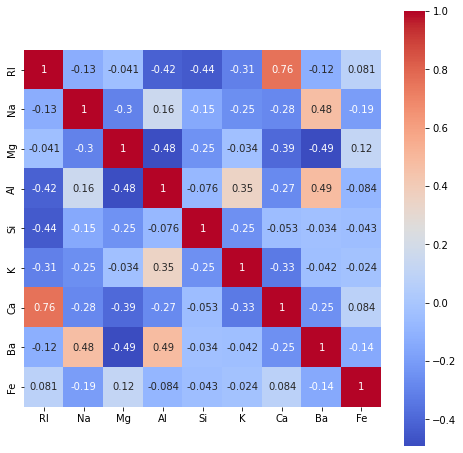

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
corr = train_x.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar = True,  square = True, annot=True,
           xticklabels= corr.columns.values, yticklabels= corr.columns.values,
           cmap= 'coolwarm')
plt.show()


In [49]:
import plotly.express as px
fig = px.pie(
    names=glass_df.Type.unique(),
    values=glass_df.Type.value_counts()
)
fig.update_layout(
    {'title': {
        'text':"Class Distribution",
        'x':0.45
    }}
)
fig.show()